In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 1s 1us/step


In [3]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [4]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [5]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [6]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [7]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [8]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 323us/step - loss: 2.5309 - acc: 0.4956 - val_loss: 1.7257 - val_acc: 0.6140
Epoch 2/20
7982/7982 [==============================] - 2s 294us/step - loss: 1.4485 - acc: 0.6880 - val_loss: 1.3464 - val_acc: 0.7060
Epoch 3/20
7982/7982 [==============================] - 2s 235us/step - loss: 1.0957 - acc: 0.7638 - val_loss: 1.1711 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 2s 255us/step - loss: 0.8699 - acc: 0.8155 - val_loss: 1.0799 - val_acc: 0.7600
Epoch 5/20
7982/7982 [==============================] - 2s 242us/step - loss: 0.7041 - acc: 0.8469 - val_loss: 0.9846 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 2s 242us/step - loss: 0.5682 - acc: 0.8791 - val_loss: 0.9408 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 3s 324us/step - loss: 0.4611 - acc: 0.9039 - val_loss: 0.9093 - val_acc: 0.8020


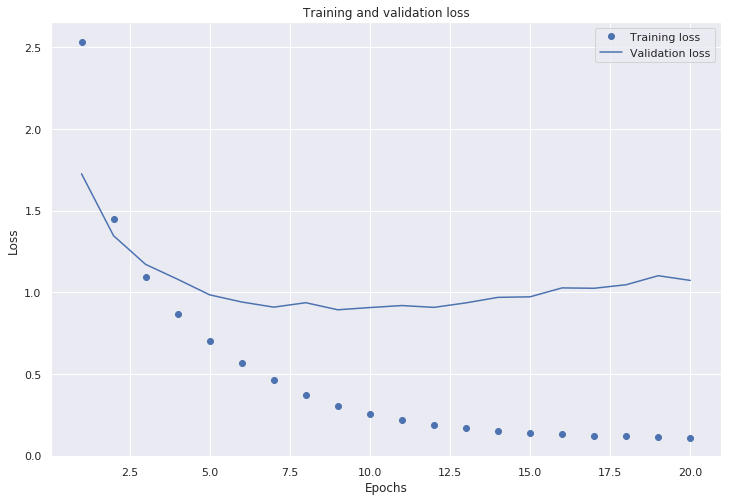

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

sns.set()
plt.figure(figsize=(12,8))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

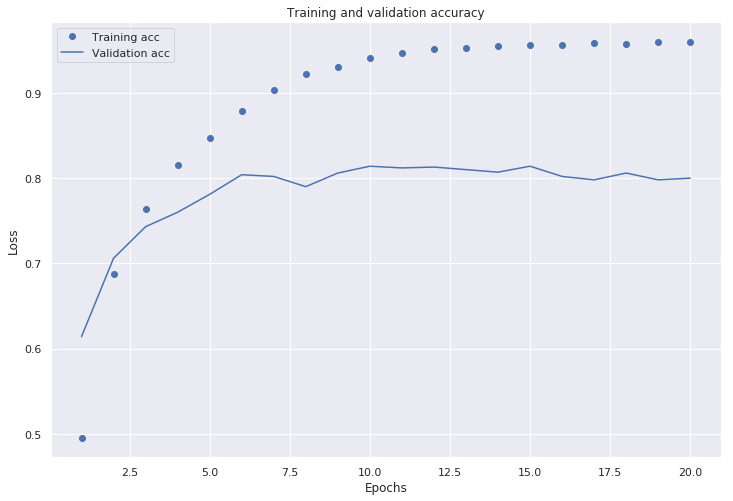

In [14]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.figure(figsize=(12,8))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [15]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

results

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 294us/step - loss: 2.5386 - acc: 0.5228 - val_loss: 1.6734 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 2s 282us/step - loss: 1.3715 - acc: 0.7126 - val_loss: 1.2762 - val_acc: 0.7190
Epoch 3/9
7982/7982 [==============================] - 2s 289us/step - loss: 1.0146 - acc: 0.7785 - val_loss: 1.1321 - val_acc: 0.7510
Epoch 4/9
7982/7982 [==============================] - 3s 417us/step - loss: 0.7982 - acc: 0.8245 - val_loss: 1.0547 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 3s 395us/step - loss: 0.6392 - acc: 0.8627 - val_loss: 0.9743 - val_acc: 0.7930
Epoch 6/9
7982/7982 [==============================] - 3s 387us/step - loss: 0.5106 - acc: 0.8926 - val_loss: 0.9078 - val_acc: 0.8100
Epoch 7/9
7982/7982 [==============================] - 4s 441us/step - loss: 0.4104 - acc: 0.9142 - val_loss: 0.8904 - val_acc: 0.8200
Epoch 8

[1.0237764509681708, 0.7756010686194165]